In [20]:
import pandas as pd
df = pd.read_csv('smoking.csv')
df = df[:2000]

In [21]:
df = df.drop(['ID','height(cm)','oral'], axis=1)

In [22]:
df['tartar'] = df['tartar'].apply(lambda x: 1 if x == 'Y' else 0)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [23]:
df.dtypes

gender                   int64
age                      int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                   int64
smoking                  int64
dtype: object

In [24]:
variabili_pca = list(df.columns[:-1])
print(variabili_pca)

['gender', 'age', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar']


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[variabili_pca])
scaled_data # nuovo dataset con standardizzate le colonne

array([[-1.27733275, -0.39599526, -0.43412491, ..., -0.24498322,
        -0.51558005,  0.88730496],
       [-1.27733275, -0.39599526, -0.43412491, ..., -0.42845308,
        -0.51558005,  0.88730496],
       [ 0.78288136,  0.88416183, -0.43412491, ..., -0.34691092,
        -0.51558005, -1.12700823],
       ...,
       [-1.27733275, -0.39599526, -1.59540422, ..., -0.34691092,
        -0.51558005,  0.88730496],
       [-1.27733275,  1.31088086, -1.98249732, ..., -0.44883862,
        -0.51558005,  0.88730496],
       [-1.27733275, -0.39599526,  0.72715439, ..., -0.32652538,
        -0.51558005,  0.88730496]])

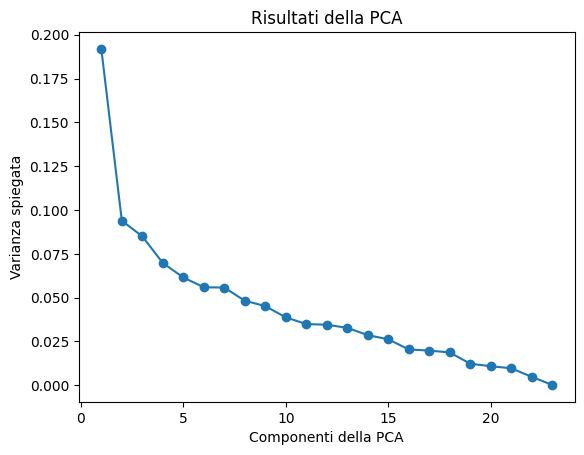

In [26]:
import matplotlib.pyplot as plt

pca = PCA().fit(scaled_data)

# Crea un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [27]:
# Applica la PCA per ridurre la dimensionalità dei dati
pca = PCA(n_components=10).fit(scaled_data)
pca_data = pca.transform(scaled_data)
# Quantifichiamo la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

[0.19193178 0.09391098 0.08497884 0.06979535 0.06151591 0.05594272
 0.05574767 0.04825151 0.04516621 0.03875693]


In [28]:
sum = 0
for data in pca.explained_variance_ratio_:
    sum += data
print(sum)

0.7459978984948168


In [29]:
pca_df = pd.DataFrame(abs(pca.components_[:10]), columns=df.columns[:-1],
                     index=['PC1','PC2','PC3','PC4','PC5',
                            'PC6','PC7','PC8','PC9','PC10'])
pca_df

,gender,age,weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
PC1,0.348378,0.103203,0.381204,0.354271,0.085651,0.083564,0.033354,0.021579,0.217389,0.227163,...,0.230474,0.086794,0.330144,0.026143,0.178800,0.196572,0.300759,0.226513,0.055743,0.066449
PC2,0.165563,0.426889,0.154504,0.001336,0.337209,0.296568,0.298175,0.304272,0.284393,0.227682,...,0.029699,0.104169,0.102954,0.010296,0.175108,0.212699,0.108840,0.186470,0.126279,0.091275
PC3,0.086849,0.070879,0.048209,0.058820,0.002318,0.033526,0.184062,0.204544,0.051146,0.020393,...,0.139542,0.639337,0.054678,0.075248,0.050571,0.061888,0.031000,0.073379,0.016504,0.005618
PC4,0.074188,0.081372,0.130056,0.150456,0.064606,0.058439,0.242141,0.199127,0.257808,0.218478,...,0.177473,0.074935,0.051311,0.100659,0.116541,0.546205,0.393176,0.432340,0.076672,0.097714
PC5,0.147678,0.120162,0.012232,0.033837,0.003927,0.147104,0.348260,0.328261,0.469659,0.521787,...,0.251906,0.183078,0.098303,0.083810,0.275499,0.016984,0.041830,0.018723,0.005027,0.060288
PC6,0.038346,0.262222,0.010320,0.108205,0.066293,0.267047,0.378997,0.414112,0.087235,0.118608,...,0.226685,0.042530,0.094132,0.314804,0.166125,0.104303,0.098472,0.024811,0.352055,0.221075
PC7,0.053660,0.079284,0.140078,0.155855,0.537945,0.256161,0.126544,0.136214,0.119256,0.118112,...,0.252817,0.031749,0.084501,0.389580,0.424603,0.141210,0.002103,0.104901,0.182386,0.184999
PC8,0.037501,0.093191,0.097183,0.063130,0.029553,0.192100,0.054869,0.064281,0.110828,0.090628,...,0.013059,0.012673,0.070519,0.378116,0.187073,0.092004,0.155844,0.011879,0.546579,0.606773
PC9,0.249478,0.098100,0.103068,0.024994,0.279239,0.454176,0.022140,0.006385,0.097795,0.089638,...,0.238420,0.052229,0.234208,0.262064,0.217462,0.032665,0.004887,0.115311,0.004586,0.236228
PC10,0.314358,0.099022,0.229936,0.326497,0.063587,0.094171,0.018081,0.010067,0.071466,0.028988,...,0.261585,0.092820,0.407510,0.274786,0.075100,0.102877,0.140328,0.137896,0.031687,0.094980


In [30]:
# crea un nuovo dataframe con le componenti principali
df_pca = pd.DataFrame(data = pca_data,
                      columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

# aggiungi la colonna target al nuovo dataframe
df_pca['target'] = df['smoking']

In [31]:
df_pca.shape

(2000, 11)

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:, :-1], df_pca.iloc[:, -1], test_size=0.2, random_state=0)

In [35]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = svm.SVC(kernel='linear', random_state=42, C=10000)

clf.fit(X_train, y_train)

# Effettua le predizioni sul test set
y_pred = clf.predict(X_test) # predizione su dati non ancora visti (inferenza)

# Calcola l'accuratezza del modello
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuratezza: {accuracy}\n\n")
print(classification_report(y_test, y_pred))
print("\n\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuratezza: 0.6975


              precision    recall  f1-score   support

           0       0.84      0.64      0.73       253
           1       0.56      0.79      0.66       147

    accuracy                           0.70       400
   macro avg       0.70      0.72      0.69       400
weighted avg       0.74      0.70      0.70       400



Confusion matrix:
 [[163  90]
 [ 31 116]]


In [36]:
print (f"Number of support vectors: {clf.support_vectors_.shape[0]}")

Number of support vectors: 971


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definisci i parametri da esplorare durante la ricerca a griglia
parameters = {'kernel': ['linear', 'poly'],
              'C': [1, 10, 100, 1000, 10000, 100000, 1000000]}

# Crea un classificatore Support Vector Machine (SVM)
svc = SVC()

# Utilizza la ricerca a griglia per trovare la combinazione ottimale di parametri
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid_search .cv_results_['mean_test_score']
stds = grid_search .cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Stampa i risultati della ricerca a griglia
print("\nMigliori parametri trovati:", grid_search.best_params_)
print("Migliore accuratezza durante la ricerca a griglia:", grid_search.best_score_)